In [1]:
import os
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

os.chdir("..")
os.chdir("..")
from driver_folder.time_driver import TimerError

In [2]:
T = TimerError()
T.start()
end_time = T.elapsed()
print(f"time taken:{end_time}")

time taken:1.317600253969431e-05


In [3]:
def primlist(weighted_adj_list):
    # Initialize the infinity value to a number greater than any edge weight
    infinity = 1 + max(
        [
            weight
            for u in weighted_adj_list.keys()
            for (v, weight) in weighted_adj_list[u]
        ]
    )

    # Initialize the visited dictionary to keep track of visited nodes
    # Initialize the distance dictionary to store the minimum distance to each node
    # Initialize the list to store the edges of the Minimum Spanning Tree (MST)
    visited = {}
    min_distance = {}
    mst_edges = []

    # Set all nodes as not visited and their initial distances to infinity
    for node in weighted_adj_list.keys():
        visited[node] = False
        min_distance[node] = infinity

    # Start with the first node (node 0)
    visited[0] = True

    # Update the distances for the adjacent nodes of node 0
    for neighbor, weight in weighted_adj_list[0]:
        min_distance[neighbor] = weight

    # Loop to find the minimum distance edge connecting a visited node to an unvisited node
    for _ in range(len(weighted_adj_list) - 1):
        min_edge_weight = infinity
        next_node = None
        next_edge = None

        # Find the minimum weight edge from the visited set to the unvisited set
        for current_node in weighted_adj_list.keys():
            for neighbor, weight in weighted_adj_list[current_node]:
                if (
                    visited[current_node]
                    and not visited[neighbor]
                    and weight < min_edge_weight
                ):
                    min_edge_weight = weight
                    next_node = neighbor
                    next_edge = (current_node, neighbor)

        # If no next node is found, the graph is disconnected
        if next_node is None:
            break

        # Mark the next node as visited and add the edge to the MST
        visited[next_node] = True
        mst_edges.append(next_edge)

        # Update the distances for the adjacent nodes of the newly visited node
        for neighbor, weight in weighted_adj_list[next_node]:
            if not visited[neighbor]:
                min_distance[neighbor] = min(min_distance[neighbor], weight)

    return mst_edges



### Explanation:

1. **Define the Three-Dimensional Array**:
   - `adj_matrix` is a 3D NumPy array of shape `(num_nodes, num_nodes, 2)`.
   - The third dimension stores two values: `[presence, weight]`, where `presence` indicates the existence of an edge (1 for present, 0 for not present), and `weight` is the weight of the edge.

2. **Populate the Adjacency Matrix**:
   - For each edge, the matrix at position `[u, v]` is updated with the presence set to `1` and the weight.

3. **Create and Draw the Graph**:
   - We use `nx.DiGraph()` to create a directed graph, which is important for handling negative cycles.
   - Edges are added to the graph and it is drawn using NetworkX and Matplotlib.
   - The `spring_layout` is used for positioning the nodes.

4. **Detect Negative Cycle**:
   - Using NetworkX's `find_negative_cycle` method (available from NetworkX version 2.6), we can detect and print any negative cycle present in the graph. If your NetworkX version does not support this method, you may need to implement a custom function or upgrade to a newer version.


In [4]:
weighted_adj_list = {
    0: [(1, 10), (7, 8)],
    1: [(0, 10), (2, 1), (5, 2)],
    2: [(1, 1), (3, 1), (5, -2), (2, -4)],
    3: [(2, 1), (4, 3)],
    4: [(3, 3), (5, -1)],
    5: [(4, -1), (6, -1), (2, -2)],
    6: [(5, -1), (7, 1)],
    7: [(6, 1), (0, 8)],
}

mst_edges = primlist(weighted_adj_list)
print("Minimum Spanning Tree Edges:", mst_edges)

Minimum Spanning Tree Edges: [(0, 7), (7, 6), (6, 5), (5, 2), (5, 4), (2, 1), (2, 3)]


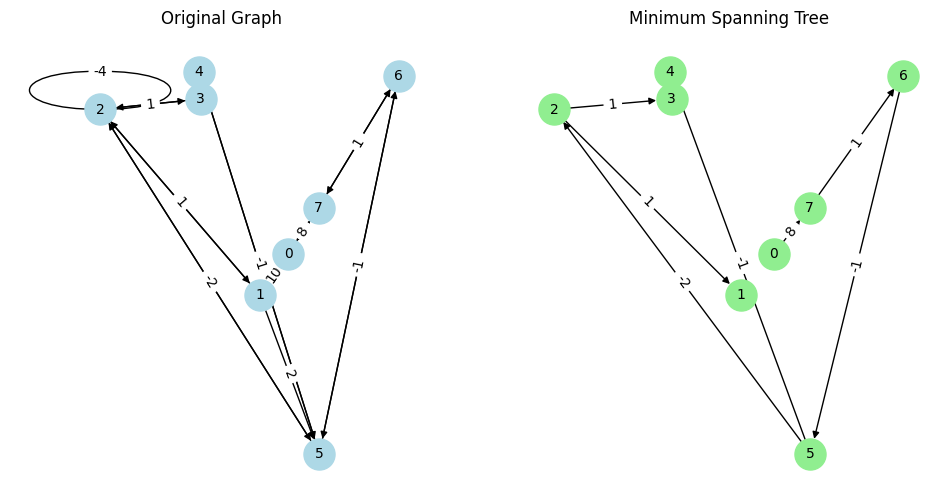

In [8]:
# Create a NetworkX graph for the original graph
G = nx.DiGraph()
for u in weighted_adj_list.keys():
    for v, weight in weighted_adj_list[u]:
        G.add_edge(u, v, weight=weight)

# Create a NetworkX graph for the MST
MST = nx.DiGraph()
for u, v in mst_edges:
    for x, weight in weighted_adj_list[u]:
        if x == v:
            MST.add_edge(u, v, weight=weight)

# Plot the original graph
pos = nx.spring_layout(G)  # Positions for all nodes
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=500,
    font_size=10,
    arrows=True,
)
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Original Graph")

# Plot the Minimum Spanning Tree
plt.subplot(122)
nx.draw(
    MST,
    pos,
    with_labels=True,
    node_color="lightgreen",
    node_size=500,
    font_size=10,
    arrows=True,
)
mst_edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in MST.edges(data=True)}
nx.draw_networkx_edge_labels(MST, pos, edge_labels=mst_edge_labels, font_size=10)
plt.title("Minimum Spanning Tree")

plt.show()

In [5]:
def prim_mst(adj_list):

    # Define infinity as a value larger than any edge weight
    infinity = 1 + max(
        [weight for node in adj_list.keys() for (neighbor, weight) in adj_list[node]]
    )

    # Initialize dictionaries to keep track of visited nodes, minimum distances, and parent nodes
    visited = {}
    min_distance = {}
    parent = {}

    # Set all nodes as not visited, their distances to infinity, and their parent to -1
    for node in adj_list.keys():
        visited[node] = False
        min_distance[node] = infinity
        parent[node] = -1

    # Start with the first node (node 0)
    visited[0] = True

    # Update the distances and parents for the adjacent nodes of node 0
    for neighbor, weight in adj_list[0]:
        min_distance[neighbor] = weight
        parent[neighbor] = 0

    # Loop to find the minimum distance edge connecting a visited node to an unvisited node
    for _ in range(1, len(adj_list.keys())):
        # Find the smallest distance among the unvisited nodes
        next_distance = min(
            [min_distance[node] for node in adj_list.keys() if not visited[node]]
        )
        next_node_candidates = [
            node
            for node in adj_list.keys()
            if not visited[node] and min_distance[node] == next_distance
        ]

        if not next_node_candidates:
            break

        # Choose the node with the smallest index among the candidates
        next_node = min(next_node_candidates)
        visited[next_node] = True

        # Update the distances and parents for the adjacent nodes of the newly visited node
        for neighbor, weight in adj_list[next_node]:
            if not visited[neighbor] and weight < min_distance[neighbor]:
                min_distance[neighbor] = weight
                parent[neighbor] = next_node

    return parent

In [6]:
# Example usage
weighted_adj_list = {
    0: [(1, 10), (7, 8)],
    1: [(0, 10), (2, 1), (5, 2)],
    2: [(1, 1), (3, 1), (5, -2), (2, -4)],
    3: [(2, 1), (4, 3)],
    4: [(3, 3), (5, -1)],
    5: [(4, -1), (6, -1), (2, -2)],
    6: [(5, -1), (7, 1)],
    7: [(6, 1), (0, 8)],
}

mst_parents = prim_mst(weighted_adj_list)
print("Parent nodes in MST:", mst_parents)

Parent nodes in MST: {0: -1, 1: 2, 2: 5, 3: 2, 4: 5, 5: 6, 6: 7, 7: 0}


In [7]:
def create_mst_edges(parents):
    """
    Creates a list of edges for the Minimum Spanning Tree (MST) from the parent node dictionary.

    Args:
    parents (dict): A dictionary where keys are nodes and values are their respective parent nodes in the MST.

    Returns:
    list: A list of tuples representing the edges in the MST.
    """
    mst_edges = []
    for child, parent in parents.items():
        if parent != -1:
            mst_edges.append((parent, child))
    return mst_edges

MST Edges: [(2, 1), (5, 2), (2, 3), (5, 4), (6, 5), (7, 6), (0, 7)]


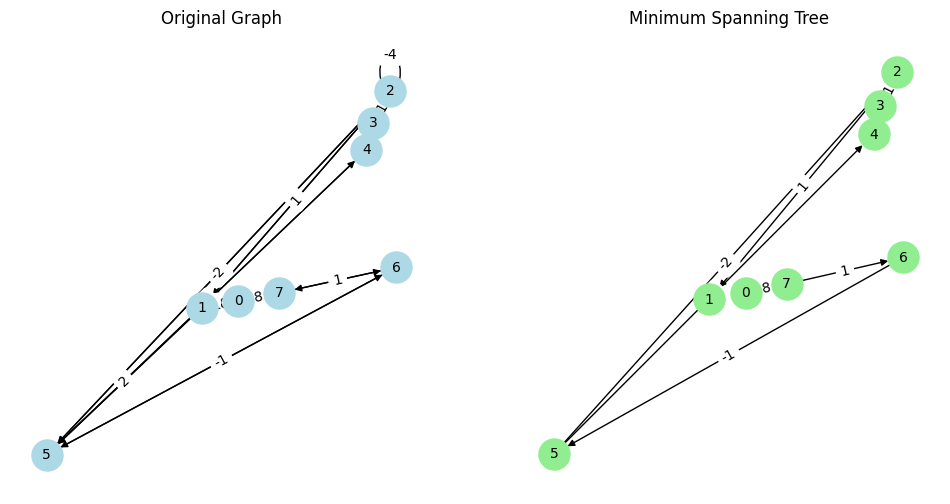

In [8]:
mst_edges = create_mst_edges(mst_parents)
print("MST Edges:", mst_edges)

# Create a NetworkX graph for the original graph
G = nx.DiGraph()
for u in weighted_adj_list.keys():
    for v, weight in weighted_adj_list[u]:
        G.add_edge(u, v, weight=weight)

# Create a NetworkX graph for the MST
MST = nx.DiGraph()
for u, v in mst_edges:
    for x, weight in weighted_adj_list[u]:
        if x == v:
            MST.add_edge(u, v, weight=weight)

# Plot the original graph
pos = nx.spring_layout(G)  # Positions for all nodes
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=500,
    font_size=10,
    arrows=True,
)
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Original Graph")

# Plot the Minimum Spanning Tree
plt.subplot(122)
nx.draw(
    MST,
    pos,
    with_labels=True,
    node_color="lightgreen",
    node_size=500,
    font_size=10,
    arrows=True,
)
mst_edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in MST.edges(data=True)}
nx.draw_networkx_edge_labels(MST, pos, edge_labels=mst_edge_labels, font_size=10)
plt.title("Minimum Spanning Tree")

plt.show()



### Explanation of the Updated Code:
1. **Function `prim_mst`**:
   - **`adj_list`**: The adjacency list of the graph.
   - **`infinity`**: A large value greater than any edge weight.
   - **`visited`**: A dictionary to keep track of visited nodes.
   - **`min_distance`**: A dictionary to store the minimum distance from the MST to each node.
   - **`parent`**: A dictionary to store the parent node of each node in the MST.
   - Initializes all nodes as not visited, sets their distances to infinity, and parents to -1.
   - Starts with node `0`, marks it as visited, and updates distances and parents for its neighbors.
   - Finds the minimum distance edge connecting a visited node to an unvisited node, updates distances and parents.
   - Returns the `parent` dictionary representing the parent of each node in the MST.

2. **Function `create_mst_edges`**:
   - **`parents`**: The parent dictionary returned by `prim_mst`.
   - Constructs the MST edges using the parent dictionary.
   - Returns a list of MST edges.

3. **Graph Construction and Plotting**:
   - Constructs the original graph and MST using NetworkX.
   - Plots the original graph and MST side-by-side with labeled nodes and edge weights using Matplotlib and NetworkX.

### Output:
- The code prints the parent nodes in the MST and the edges in the MST.
- It displays two plots: the original graph and the Minimum Spanning Tree (MST).